In [24]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras

In [25]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [26]:
print('Training Images: {}' .format(x_train.shape))
print('Testing Images: {}' .format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [27]:
print(x_train[0].shape)

(32, 32, 3)


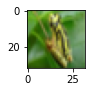

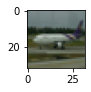

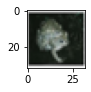

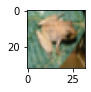

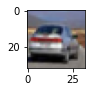

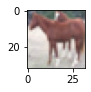

In [28]:
for i in range(232,238):
    plt.subplot(120+ 1+ i)
    img=x_train[i]
    plt.imshow(img)
    plt.show()

In [29]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 225
x_test /= 225
n_classes = 10

print("shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("shape after one-hot encoding: ", y_train.shape)

shape before one-hot encoding:  (50000, 1)
shape after one-hot encoding:  (50000, 10)


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))


model.add(Conv2D(75, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 565s 722ms/step - loss: 1.5298 - accuracy: 0.4438 - val_loss: 1.1297 - val_accuracy: 0.6026
Epoch 2/10
782/782 [==============================] - 563s 720ms/step - loss: 1.0759 - accuracy: 0.6195 - val_loss: 0.8987 - val_accuracy: 0.6890
Epoch 3/10
782/782 [==============================] - 562s 719ms/step - loss: 0.9122 - accuracy: 0.6811 - val_loss: 0.8159 - val_accuracy: 0.7178
Epoch 4/10
782/782 [==============================] - 563s 720ms/step - loss: 0.8158 - accuracy: 0.7162 - val_loss: 0.7570 - val_accuracy: 0.7329
Epoch 5/10
782/782 [==============================] - 568s 726ms/step - loss: 0.7383 - accuracy: 0.7409 - val_loss: 0.7377 - val_accuracy: 0.7484
Epoch 6/10
782/782 [==============================] - 572s 732ms/step - loss: 0.6812 - accuracy: 0.7619 - val_loss: 0.6997 - val_accuracy: 0.7570
Epoch 7/10
782/782 [==============================] - 572s 732ms/step - loss: 0.6309 - accuracy: 0.7786 - val_loss: 0.6823 -

In [32]:
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']


class_labels = dict(zip(classes, names))

batch = x_test[100:109]
labels = np.argmax(y_test[100:109],axis=-1)

predictions=model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 136ms/step


In [33]:
print(predictions)

[[3.25142930e-04 2.38946468e-05 1.02331843e-02 2.10523009e-02
  4.90546852e-01 5.81876375e-02 9.69941495e-04 4.18335766e-01
  5.34327555e-05 2.71948986e-04]
 [2.81777669e-04 8.58371568e-05 2.93158107e-02 8.00179839e-02
  6.78569898e-02 6.84153259e-01 1.62421707e-02 1.21242575e-01
  1.44993741e-04 6.58634002e-04]
 [3.30467330e-04 7.20468629e-03 1.43057434e-02 2.74168681e-02
  1.04128262e-02 9.31220055e-02 8.32460701e-01 1.09213879e-02
  4.63202246e-04 3.36215738e-03]
 [1.32563582e-04 6.43148742e-05 6.38257945e-03 7.21184731e-01
  1.04334190e-01 1.03165947e-01 6.24480471e-02 1.73458923e-03
  1.58096562e-04 3.94978968e-04]
 [2.19983372e-06 9.52299714e-01 1.76013093e-11 4.52622917e-09
  7.94657048e-12 2.95318103e-10 3.37039424e-10 1.57845004e-09
  6.23128972e-06 4.76919226e-02]
 [4.79339506e-05 9.83543694e-01 3.22054603e-07 1.38305286e-05
  3.15421396e-08 1.85192880e-06 3.31424962e-06 1.83486122e-07
  1.45718781e-02 1.81683956e-03]
 [8.23516920e-02 7.75274821e-03 1.08805532e-02 5.82239389e

In [34]:
for image in predictions:
    print(np,sum(image))

<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'> 1.0000001014941517
<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'> 1.0000000317886588
<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'> 1.000000045838533
<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'> 1.0000000376821845
<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'> 1.0000000746092976
<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'> 0.9999998794493017
<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'> 0.9999999190913513
<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'> 0.9999999311726773
<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'> 0.9999999595592186


In [35]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


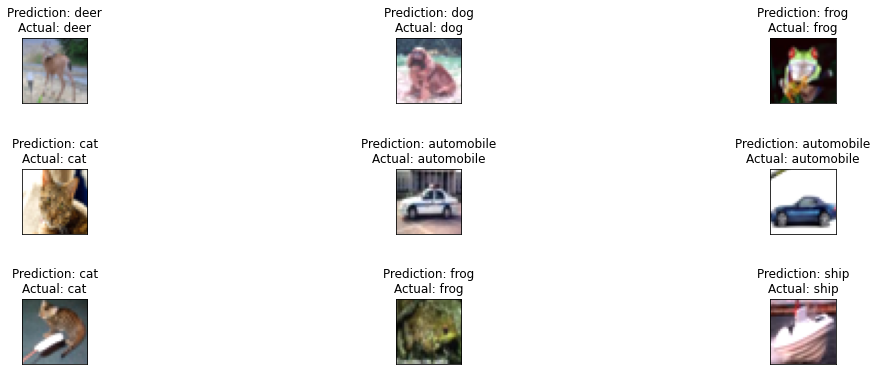

In [36]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    
    axs[i].imshow(img)
    
plt.show()